#Overview

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
#Load data and Preview
data = pd.read_csv('dataset/dataset.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [10]:
#Explore columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [13]:
#Check dataset size
data.shape

(142193, 24)

In [11]:
#Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


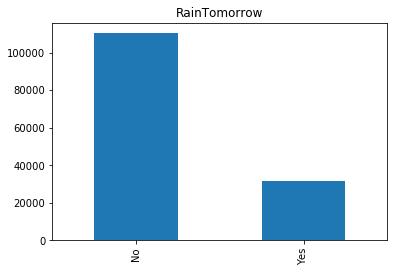

In [19]:
#Explore RainTomorrow field
import matplotlib.pyplot as plt

data['RainTomorrow'].value_counts().plot(kind='bar')
plt.title('RainTomorrow')
plt.show()

In [5]:
# Check numeric and categorical fields
df_num = data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']]
df_cat = data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]

c:\users\pramod\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\pramod\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


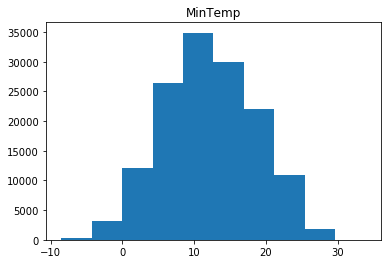

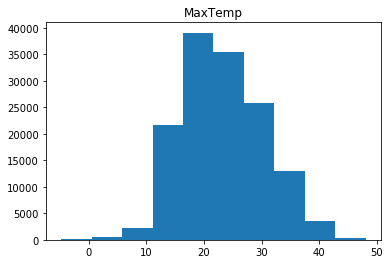

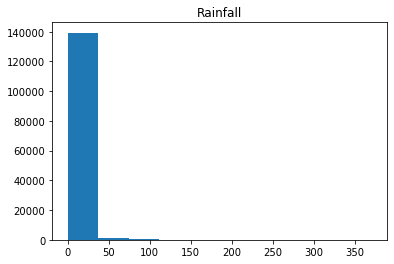

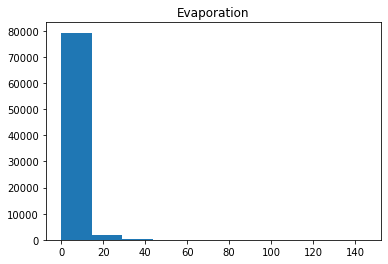

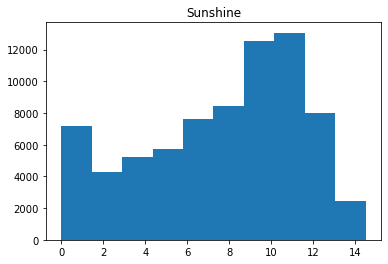

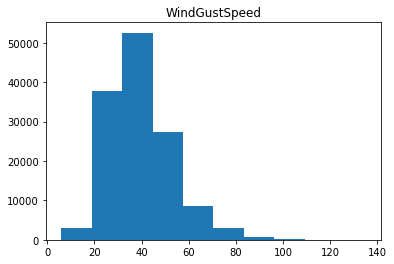

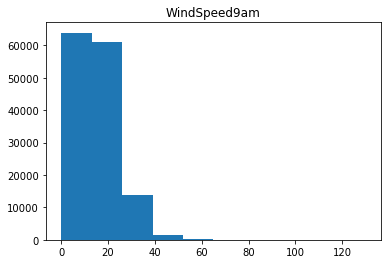

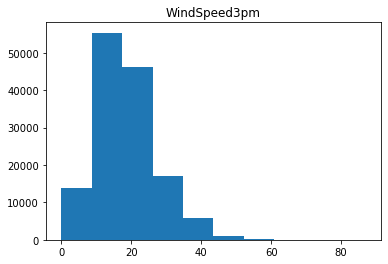

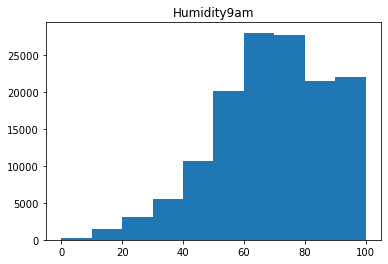

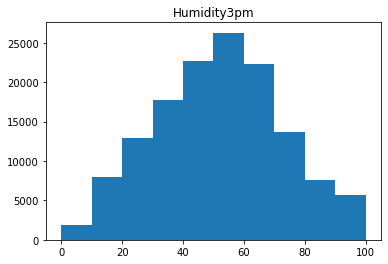

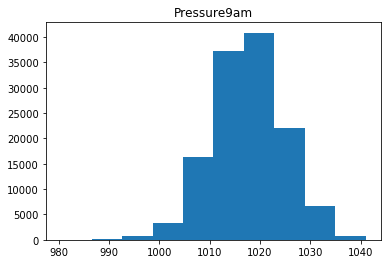

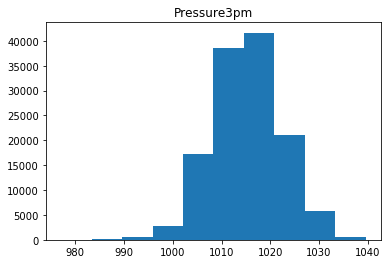

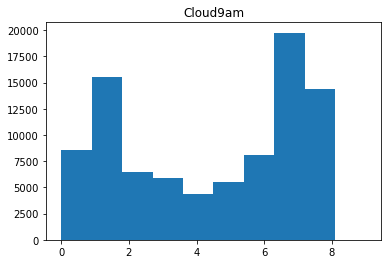

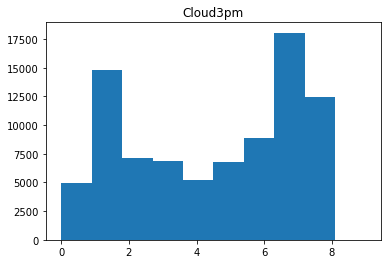

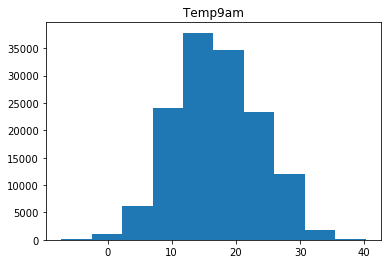

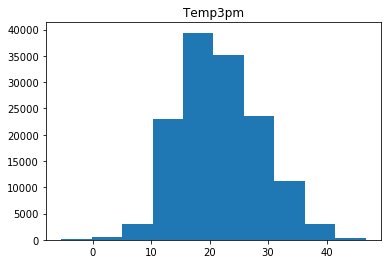

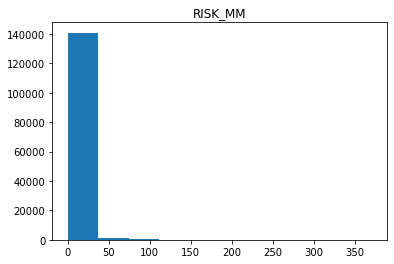

In [22]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

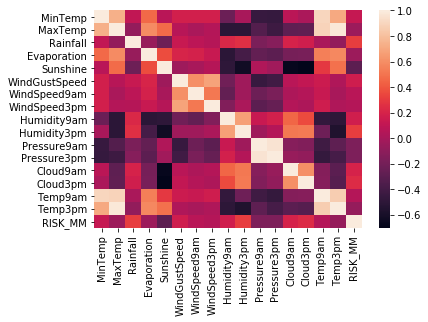

In [24]:
#Correlation matrix
sns.heatmap(df_num.corr())

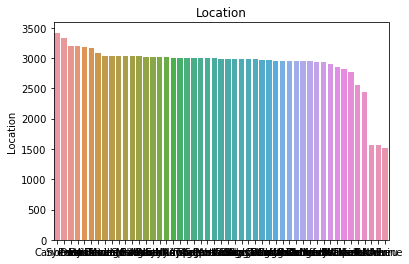

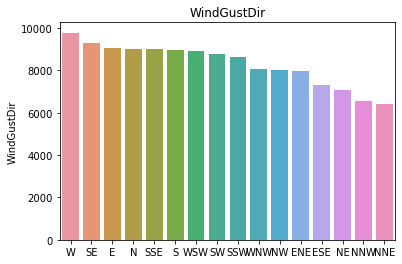

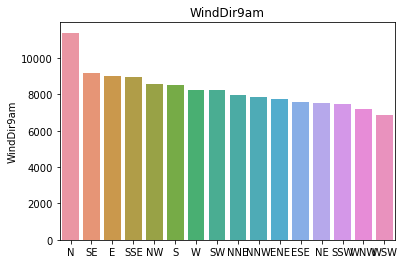

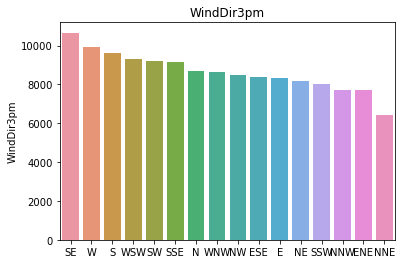

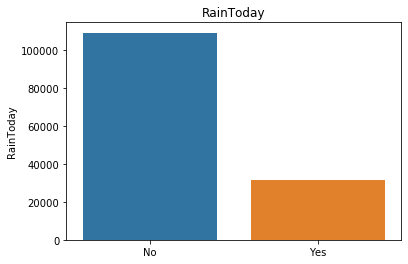

In [6]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [26]:
# Check RainToday Vs Numerical columns
pd.pivot_table(data, index = 'RainToday', values = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM'])

,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RISK_MM,Rainfall,Sunshine,Temp3pm,Temp9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am
RainToday,,,,,,,,,,,,,,,,,
No,4.086652,3.939797,5.890049,47.232683,65.221578,24.108619,11.991807,1015.659341,1018.378282,1.315719,0.075187,8.305562,22.565729,17.323202,38.846056,18.253930,13.503050
Yes,5.827074,6.018474,3.987430,66.179459,81.413254,20.199442,12.855535,1013.864569,1015.141788,5.780277,10.256732,5.314459,18.648725,15.815762,43.934603,19.946892,15.684721


In [28]:
# Check RainToday Vs Categorical columns
#'Location','WindGustDir','WindDir9am','RainToday'
print(pd.pivot_table(data, index = 'RainTomorrow', columns = 'Location', values = 'Date' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'RainTomorrow', columns = 'WindGustDir', values = 'Date' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'RainTomorrow', columns = 'WindDir9am', values = 'Date' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'RainTomorrow', columns = 'RainToday', values = 'Date' ,aggfunc ='count'))

Location      Adelaide  Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  \
RainTomorrow                                                                    
No                2402    2114    2393          2787           2345      2247   
Yes                688     902     618           244            583       781   

Location      Bendigo  Brisbane  Cairns  Canberra  ...  Townsville  \
RainTomorrow                                       ...               
No               2472      2452    2038      2789  ...        2514   
Yes               562       709     950       629  ...         519   

Location      Tuggeranong  Uluru  WaggaWagga  Walpole  Watsonia  Williamtown  \
RainTomorrow                                                                   
No                   2430   1405        2440     1870      2261         1853   
Yes                   568    116         536      949       738          700   

Location      Witchcliffe  Wollongong  Woomera  
RainTomorrow            

In [ ]:
sns.pairplot( data=data, vars=('MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM'), hue='RainTomorrow' )

In [7]:
#Check Null value %
df_null = data.isnull().sum().sort_values(ascending=False).reset_index()
df_null.columns = ['Variable','NullCount']
df_null['null%'] = (df_null['NullCount']/142193)*100
df_null

,Variable,NullCount,null%
0,Sunshine,67816,47.692924
1,Evaporation,60843,42.789026
2,Cloud3pm,57094,40.152469
3,Cloud9am,53657,37.735332
4,Pressure9am,14014,9.855619
5,Pressure3pm,13981,9.832411
6,WindDir9am,10013,7.041838
7,WindGustDir,9330,6.561504
8,WindGustSpeed,9270,6.519308
9,WindDir3pm,3778,2.656952
